<a href="https://colab.research.google.com/github/Guylord/Stock-Price-Prediction-using-LSTM/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing yfinance library to fetch financial data
import yfinance as yf

# Define the stock ticker symbol and download the historical stock data from Yahoo Finance
ticker = "AAPL"
data = yf.download(ticker, start="2016-01-01", end="2024-12-5")

# Resetting the index to have Date as a column instead of an index
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Previewing the data
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-04,23.860584,26.337500,26.342501,25.500000,25.652500,270597600
1,2016-01-05,23.262650,25.677500,26.462500,25.602501,26.437500,223164000
2,2016-01-06,22.807404,25.174999,25.592501,24.967501,25.139999,273829600
3,2016-01-07,21.844830,24.112499,25.032499,24.107500,24.670000,324377600
4,2016-01-08,21.960339,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...,...
2241,2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400
2242,2024-11-29,237.330002,237.330002,237.809998,233.970001,234.809998,28481400
2243,2024-12-02,239.589996,239.589996,240.789993,237.160004,237.270004,48137100


In [ ]:
# Displaying the information of the DataFrame (structure, types, non-null counts, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2246 non-null   datetime64[ns]
 1   (Adj Close, AAPL)  2246 non-null   float64       
 2   (Close, AAPL)      2246 non-null   float64       
 3   (High, AAPL)       2246 non-null   float64       
 4   (Low, AAPL)        2246 non-null   float64       
 5   (Open, AAPL)       2246 non-null   float64       
 6   (Volume, AAPL)     2246 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 123.0 KB


In [ ]:
# Checking the column names
data.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
# Renaming the columns to remove multi-level index (from 'Price' and 'Ticker') for easier access
data.columns = data.columns.map(lambda x: f"{x[0]}" if x[1] else x[0])
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# Reordering the columns
column_order = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data = data.reindex(columns=column_order)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.860584,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.262650,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.807404,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.844830,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,21.960339,283192000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2246 non-null   datetime64[ns]
 1   Open       2246 non-null   float64       
 2   High       2246 non-null   float64       
 3   Low        2246 non-null   float64       
 4   Close      2246 non-null   float64       
 5   Adj Close  2246 non-null   float64       
 6   Volume     2246 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 123.0 KB


In [ ]:
data.drop(columns='Date').describe()

,Open,High,Low,Close,Adj Close,Volume
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2.246000e+03
mean,102.477045,103.574469,101.460201,102.572885,100.583766,1.075153e+08
std,63.548410,64.199885,62.941650,63.610607,64.002865,5.820243e+07
min,22.500000,22.917500,22.367500,22.584999,20.697269,2.404830e+07
25%,42.921250,43.272499,42.565624,42.883749,40.649242,6.902462e+07
50%,88.088749,88.994999,87.538750,88.114998,85.860493,9.432060e+07
75%,158.707504,160.434998,155.695004,157.785000,155.902927,1.297685e+08
max,242.869995,244.110001,241.250000,243.009995,243.009995,5.334788e+08


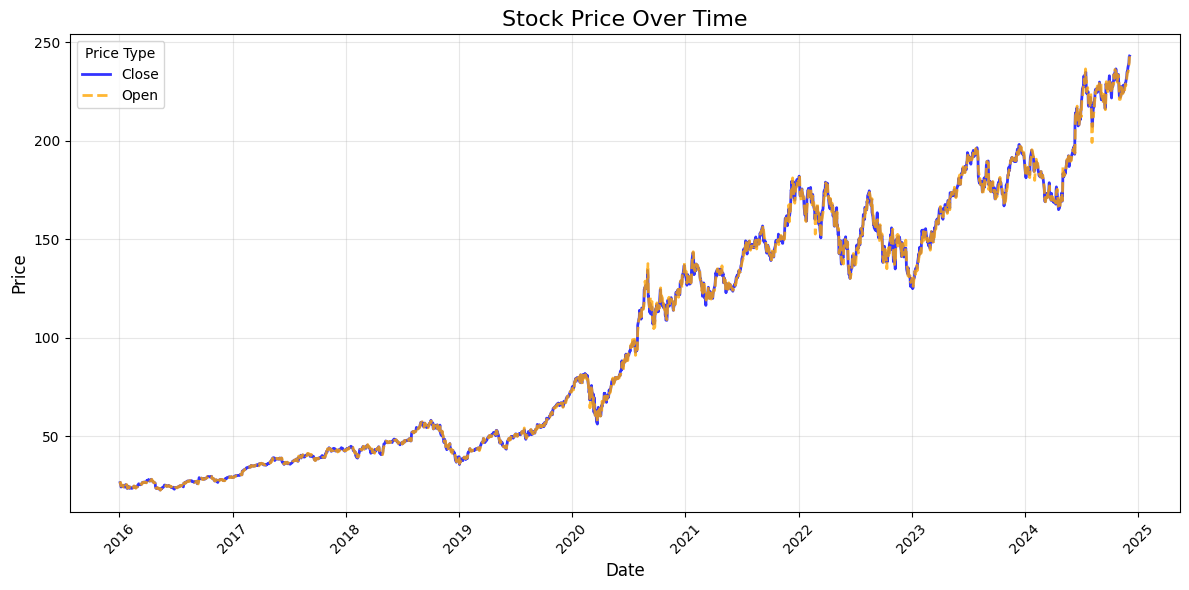

In [ ]:
# Plot Open and Close prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='blue', linestyle='-', alpha=0.8, linewidth=2)
plt.plot(data['Date'], data['Open'], label='Open', color='orange', linestyle='--', alpha=0.8, linewidth=2)
plt.title('Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Price Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)  # Add a light grid for readability

# Adjust layout and display plot
plt.tight_layout()
plt.show()

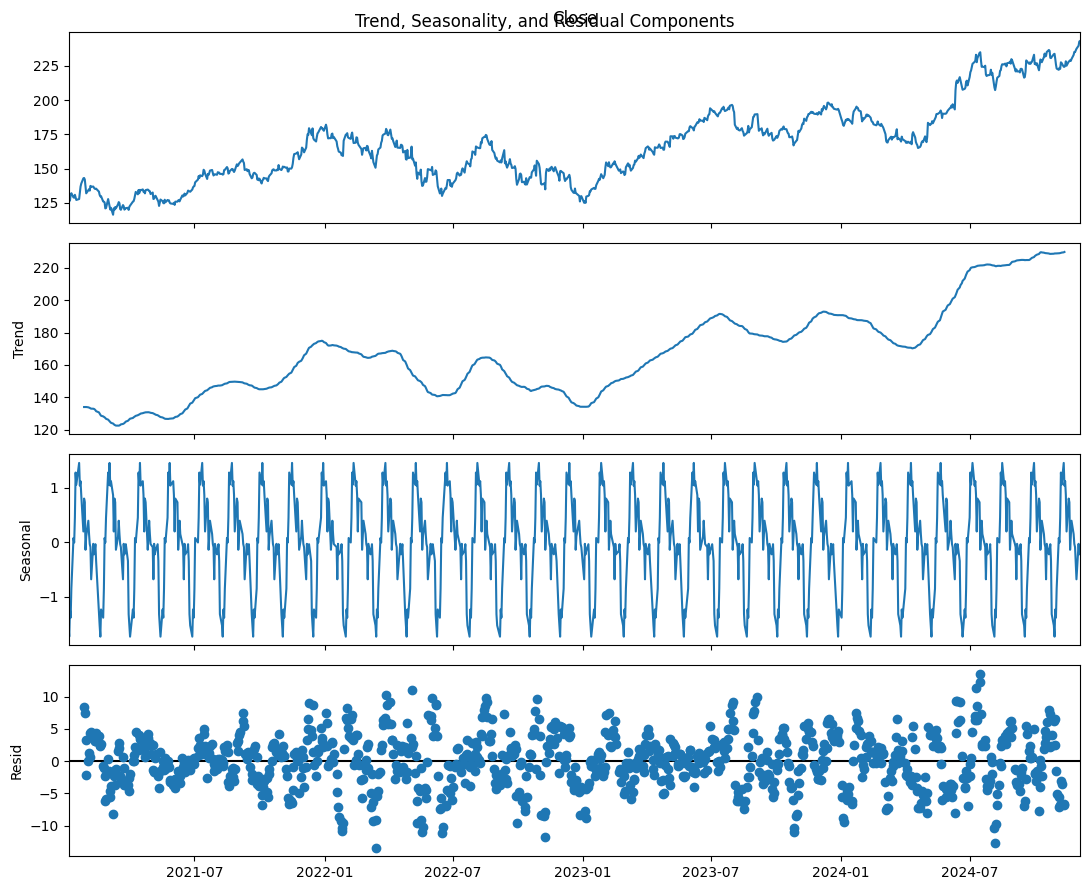

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

# Decompose the 'Close' prices into components
decompose_result = seasonal_decompose(data.loc['2021':'2024', 'Close'], model='additive', period=30)

# Plot the components
plt.rcParams['figure.figsize'] = 11, 9
decompose_result.plot()
plt.suptitle('Trend, Seasonality, and Residual Components')
##plt.tight_layout()
plt.show()

In [ ]:
# Extracting the 'Close' prices for use in the model
close_prices = data['Close'].values.reshape(-1, 1)

In [ ]:
# Importing MinMaxScaler to normalize the data for the LSTM model
from sklearn.preprocessing import MinMaxScaler

# Scaling the close prices to the range 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Setting the sequence length (number of past days to look at for predicting the next day's price)
sequence_length = 60

# Preparing the input (X) and output (y) for model training
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

# Converting X and y into numpy arrays for use in training
X, y = np.array(X), np.array(y)

In [ ]:
# Splitting the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Importing necessary layers for the LSTM model from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# RNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(units=25, activation='relu'),
    Dense(units=1)  # Predict one value (next day's price)
])

# Compiling
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0395 - val_loss: 5.0071e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3084e-04 - val_loss: 5.2612e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3135e-04 - val_loss: 4.3277e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8133e-04 - val_loss: 5.2235e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3697e-04 - val_loss: 4.1328e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0905e-04 - val_loss: 4.6238e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8396e-04 - val_loss: 3.7874e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7349e-04 - val_loss: 4.3081e-04
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8437e-04 - val_loss: 7.2500e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0048e-04 - val_loss: 3.4964e-04


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


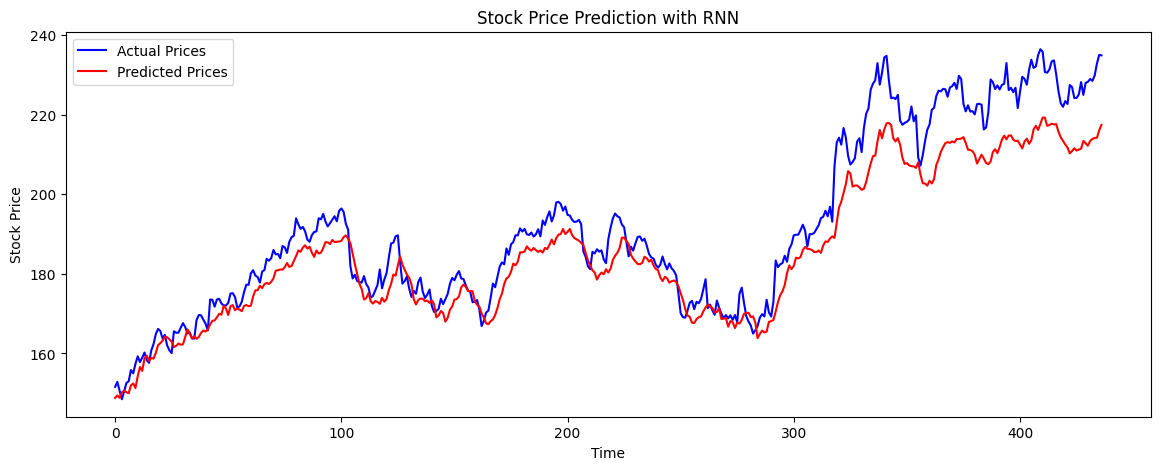

In [ ]:
# Predicting using test set
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Transform back to original scale

# Transforming the actual test prices back to the original scale
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Actual vs. predicted prices
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with RNN')
plt.legend()
plt.show()

In [ ]:
# Building the LSTM model
model = Sequential([
    LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(150, return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(1) # Output layer with one neuron (predicting the closing price)
])

# Compiling the model with Adam optimizer and Mean Squared Error loss function
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
# Training the model with the training data, validating on the test data, and using 50 epochs
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0170 - val_loss: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.9065e-04 - val_loss: 0.0029
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2078e-04 - val_loss: 8.8934e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9567e-04 - val_loss: 8.1336e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3314e-04 - val_loss: 0.0033
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.2129e-04 - val_loss: 0.0034
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7872e-04 - val_loss: 7.7696e-04
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.1922e-04 - val_loss: 6.0957e-04
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4160e-04 - val_loss: 9.7978e-04
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8715e-04 - val_loss: 0.0016
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.5242e-04 

In [ ]:
# Making predictions using the trained LSTM model on the test data (X_test)
predictions = model.predict(X_test)

# Inverse transforming the predictions back to the original scale of stock prices using the scaler
# This converts the normalized predicted values back to their actual price values
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


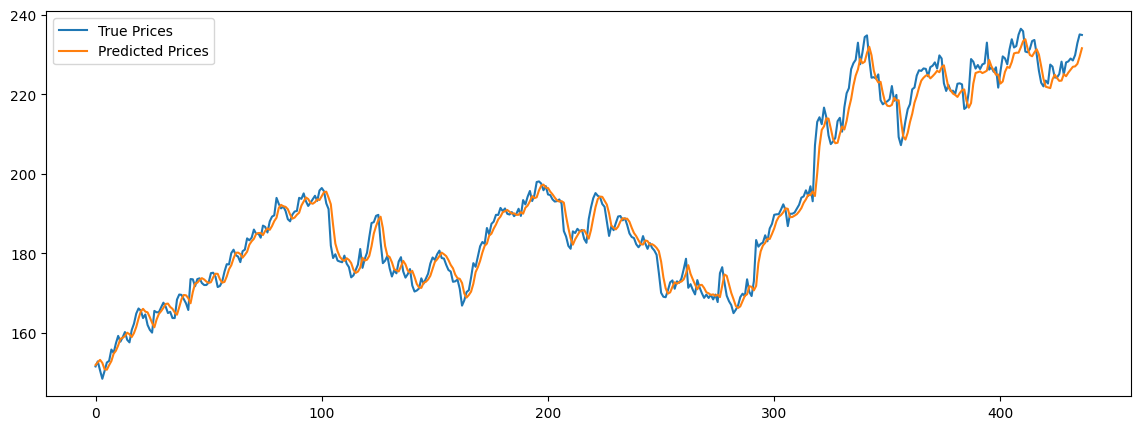

In [ ]:
# Plotting the true vs predicted stock prices for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

# **Model Optimization**




Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7826e-04 - val_loss: 0.0030
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0153e-04 - val_loss: 5.9366e-04
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0796e-04 - val_loss: 7.9507e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7059e-04 - val_loss: 4.6160e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2588e-04 - val_loss: 2.8283e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.0124e-04 - val_loss: 7.7993e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.7421e-04 - val_loss: 2.5683e-04
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4951e-04 - val_loss: 3.7210e-04
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5761e-04 - val_loss: 4.5053e-04
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1986e-04 - val_loss: 8.6493e-04
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

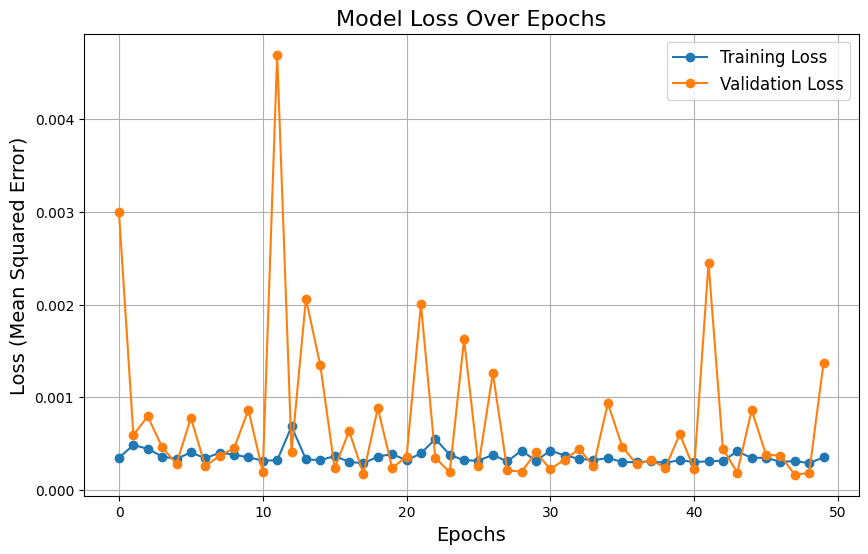

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

# Extracting loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Helper function to build the model
def build_model(lstm_units, lstm_units2, lstm_units3, learning_rate):
    model = Sequential([
              LSTM(lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)),
              Dropout(0.2),
              LSTM(lstm_units2, return_sequences=False),
              Dropout(0.2),
              Dense(lstm_units3),
              Dense(1) # Output layer with one neuron (predicting the closing price)
          ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

Grid Search Optimizization

Random Search

In [ ]:
import random

# Random Search for Optimization
param_grid = {
    'lstm_units': [25, 50, 100, 150],
    'lstm_units2': [25, 50, 100, 150],
    'lstm_units3': [25, 50, 100, 150],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005]
}

# Number of parameter combinations to try
n_random_trials = 30

# Helper function to build the model
def build_model(lstm_units, lstm_units2, lstm_units3, learning_rate):
    model = Sequential([
        LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(0.2),
        LSTM(units=lstm_units3, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Random search logic
best_model = None
best_params = None
lowest_val_loss = float('inf')

for _ in range(n_random_trials):
    # Randomly sample parameters
    lstm_units = random.choice(param_grid['lstm_units'])
    lstm_units2 = random.choice(param_grid['lstm_units2'])
    lstm_units3 = random.choice(param_grid['lstm_units3'])
    batch_size = random.choice(param_grid['batch_size'])
    learning_rate = random.choice(param_grid['learning_rate'])

    print(f"Testing params: LSTM Units1={lstm_units}, LSTM Units2={lstm_units2}, "
          f"LSTM Units3={lstm_units3}, Batch Size={batch_size}, Learning Rate={learning_rate}")

    # Build and train model
    model = build_model(lstm_units, lstm_units2, lstm_units3, learning_rate)
    history = model.fit(
        X_train, y_train,
        epochs=10,  # Reduce for faster testing
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Check validation loss
    val_loss = min(history.history['val_loss'])
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        best_model = model
        best_params = {
            'lstm_units': lstm_units,
            'lstm_units2': lstm_units2,
            'lstm_units3': lstm_units3,
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }

# Output best parameters and validation loss
print(f"Best Parameters: {best_params}")
print(f"Lowest Validation Loss: {lowest_val_loss}")

Testing params: LSTM Units1=50, LSTM Units2=150, LSTM Units3=50, Batch Size=32, Learning Rate=0.001
Testing params: LSTM Units1=50, LSTM Units2=150, LSTM Units3=25, Batch Size=16, Learning Rate=0.001
Testing params: LSTM Units1=150, LSTM Units2=25, LSTM Units3=100, Batch Size=16, Learning Rate=0.004
Testing params: LSTM Units1=100, LSTM Units2=25, LSTM Units3=25, Batch Size=64, Learning Rate=0.003
Testing params: LSTM Units1=150, LSTM Units2=150, LSTM Units3=50, Batch Size=64, Learning Rate=0.002
Testing params: LSTM Units1=25, LSTM Units2=100, LSTM Units3=150, Batch Size=16, Learning Rate=0.001
Testing params: LSTM Units1=25, LSTM Units2=100, LSTM Units3=50, Batch Size=64, Learning Rate=0.001
Testing params: LSTM Units1=50, LSTM Units2=100, LSTM Units3=150, Batch Size=16, Learning Rate=0.002
Testing params: LSTM Units1=100, LSTM Units2=150, LSTM Units3=25, Batch Size=64, Learning Rate=0.002
Testing params: LSTM Units1=100, LSTM Units2=150, LSTM Units3=100, Batch Size=16, Learning Rate

In [ ]:
# Evaluate the best model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027
Test Loss: 0.004697671625763178


In [ ]:
!pip install scikeras

In [ ]:
from itertools import product
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
import numpy as np

# Parameter grid
param_grid = {
    'lstm_units': [25, 50, 100, 150],
    'lstm_units2': [25, 50, 100, 150],
    'lstm_units3': [25, 50, 100, 150],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005]
}

# Generate all possible parameter combinations
param_combinations = list(product(
    param_grid['lstm_units'],
    param_grid['lstm_units2'],
    param_grid['lstm_units3'],
    param_grid['batch_size'],
    param_grid['learning_rate']
))

# Helper function to build the model
def build_model(lstm_units, lstm_units2, lstm_units3, learning_rate):
    model = Sequential([
        LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(0.2),
        LSTM(units=lstm_units3, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Grid search logic
best_model = None
best_params = None
lowest_val_loss = float('inf')

# Iterate over all parameter combinations
for params in param_combinations:
    lstm_units, lstm_units2, lstm_units3, batch_size, learning_rate = params
    print(f"Testing params: LSTM Units1={lstm_units}, LSTM Units2={lstm_units2}, "
          f"LSTM Units3={lstm_units3}, Batch Size={batch_size}, Learning Rate={learning_rate}")

    # Build and train the model
    model = build_model(lstm_units, lstm_units2, lstm_units3, learning_rate)
    history = model.fit(
        X_train, y_train,
        epochs=10,  # Adjust for practical runtime
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Check validation loss
    val_loss = min(history.history['val_loss'])
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        best_model = model
        best_params = {
            'lstm_units': lstm_units,
            'lstm_units2': lstm_units2,
            'lstm_units3': lstm_units3,
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }

# Output best parameters and validation loss
print(f"Best Parameters: {best_params}")
print(f"Lowest Validation Loss: {lowest_val_loss}")


Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=16, Learning Rate=0.001
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=16, Learning Rate=0.002
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=16, Learning Rate=0.003
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=16, Learning Rate=0.004
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=16, Learning Rate=0.005
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=32, Learning Rate=0.001
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=32, Learning Rate=0.002
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=32, Learning Rate=0.003
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=32, Learning Rate=0.004
Testing params: LSTM Units1=25, LSTM Units2=25, LSTM Units3=25, Batch Size=32, Learning Rate=0.005
Testing pa